REGRESIÓN LOGÍSTICA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split

In [2]:
#Descargamos desde kaggle los datos Titanic: Machine Learning from Disaster y creamos nuestro dataset
entrenamiento = pd.read_csv('train.csv')

In [3]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Podemos limpiar el dataset quitando por ejemplom las filas que contengan datos nulos
entrenamiento.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

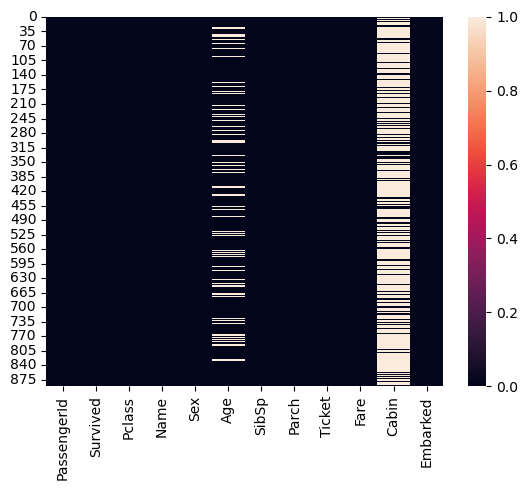

In [5]:
# Podemos creear un gráfico donde nos diga si en cada una de las columnas contiene valor nulo
sns.heatmap(entrenamiento.isnull())

In [6]:
#Podemos observar que los valorees nulos (que se desconocen) están en la edad y en la cabina
# De aqui podemos obtener las columnas que podemos descartar de nuestro análisis xq no tienen datos suficientes

<Axes: xlabel='Survived', ylabel='count'>

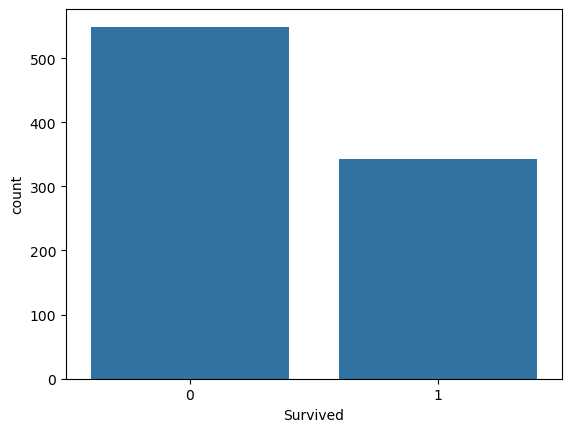

In [7]:
# Podemos contar, x ejemplo, el nº de supervivientes
sns.countplot(x='Survived', data= entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

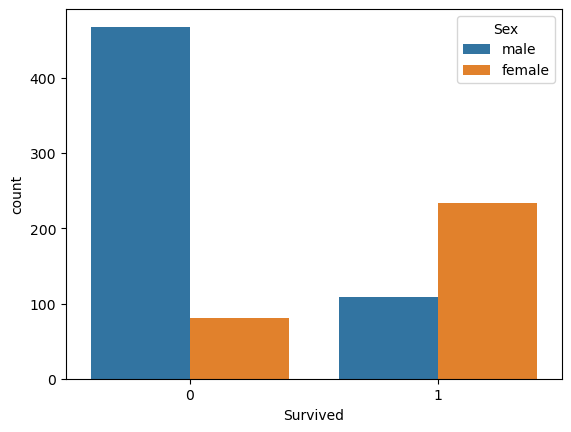

In [8]:
# Supervivienteds divididos segun sexo
sns.countplot(x='Survived', data= entrenamiento, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

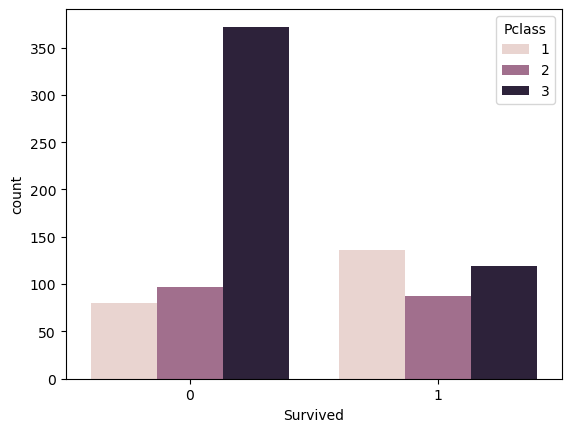

In [9]:
#Podriamos separalos tb, x ejemplo, x la clase:
sns.countplot(x='Survived', data= entrenamiento, hue='Pclass')

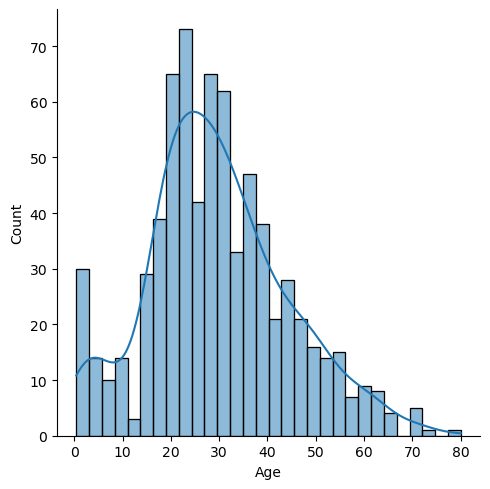

In [10]:
# Podemos hscer una disttribución por edades
# dropna borra los nulos, bins=30 es el nº de volumnas, kde=True es para que se marque la línea que recorre el gráfico
sns.displot(entrenamiento['Age'].dropna(), kde=True, bins=30)

<Axes: ylabel='Frequency'>

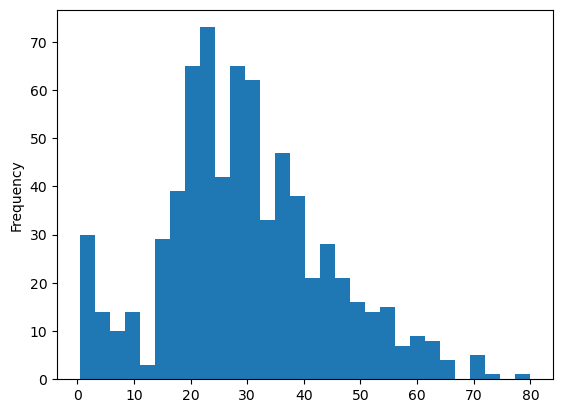

In [11]:
# Este gráfico tb se puede sacar directamente a partir de dataframe
entrenamiento['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

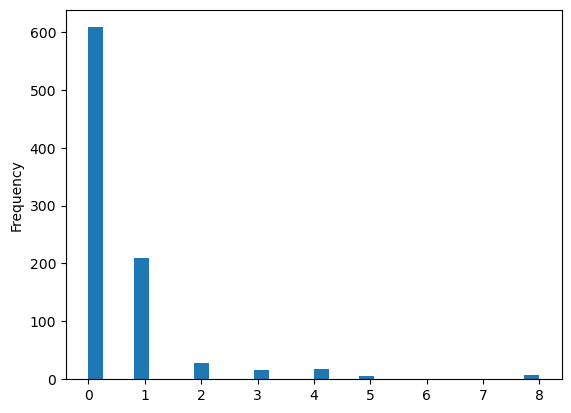

In [12]:
# Podemos saber tb el nº de familiares que tenía cada pasajero
entrenamiento['SibSp'].plot.hist(bins=30)

In [13]:
# Podemos sacar tb gráficos más interactivos
import cufflinks as cf

In [14]:
cf.go_offline()

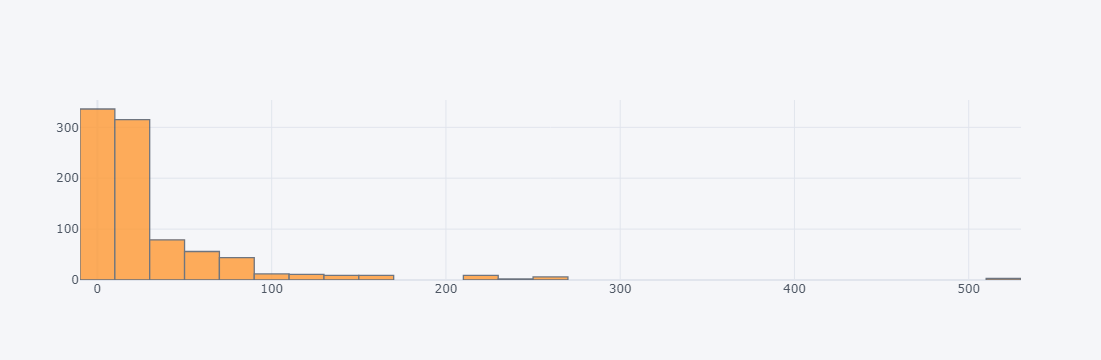

In [15]:
entrenamiento['Fare'].iplot(kind='hist', bins=40)

LIMPIEZA DE LOS DATOS

<Axes: xlabel='Pclass', ylabel='Age'>

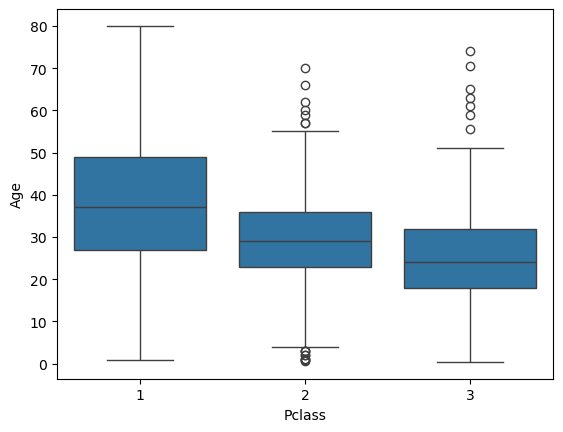

In [16]:
# Para ellos vamos a basarnos en el mapa de calor que obtuvimos anteriormente donde vimos q había 2 columnas con muchos valores nulos (edad y cabina)
# En la edad, vamos a modificar el dataset y en los valores nulos vamos a poner el valor medio de las edades según la clase en la que esté
# Calculamos primero con un diagrama de cajas la edad media por cada clase 
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [17]:
#Vamos a hacer una función para ir rellenando los valores nulos con nuestros valores
def edad_media(columnas):
    edad=columnas[0]
    clase=columnas[1]
    if pd.isnull(edad):
        if clase==1:
            return 38
        elif clase==2:
            return 30
        else:
            return 25
    else: 
        return edad


In [18]:
#Aplicamos esta función a cada valor de la columna edad
# axis=1 es para aplicar la función a las columnas
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

C:\Users\34649\AppData\Local\Temp\ipykernel_920\455119814.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\34649\AppData\Local\Temp\ipykernel_920\455119814.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

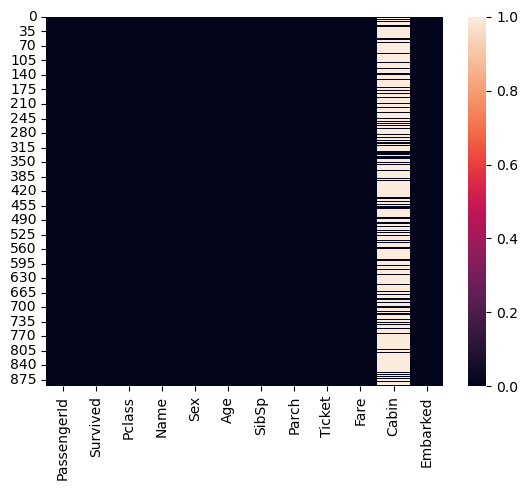

In [19]:
# Volvemos a poner nuestro mapa de calor y vemos como ya edad no tiene nulos:
sns.heatmap(entrenamiento.isnull())

In [20]:
# Pasamos a la columna cabin, y vemos q la mayor parte son blancos(nulos), con lo cual no tiene mucho sentido ponerle valor a esas filas
# Por ello, borramos la columna (inplace=True para borrarla definitivamente, axis=1 indica que borramos columna
entrenamiento.drop('Cabin', axis=1, inplace=True)

<Axes: >

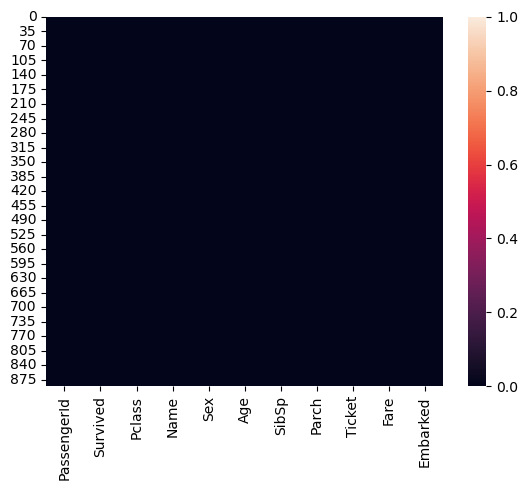

In [21]:
sns.heatmap(entrenamiento.isnull())

In [22]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
#Nos interesa dejar solo las columnas nunméricas para hacer nuestros algoritmos. Eliminamos entonces 'Name' y 'Ticket'
# Borramos tb PassengerId xq no nos aporta informaión relevante
entrenamiento.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [24]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
#Convertimos la columna 'Sex' en alfanumérica(Por ejemplo hombre valor 1 mujer valor 0)
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)
sexo

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [26]:
# Borramos la columna 'Sex' y añadimos 'sexo'
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

In [27]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [28]:
entrenamiento.drop('Sex', axis=1, inplace=True)

In [29]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


In [30]:
#Hacemos lo mismo con embarque
puerto = pd.get_dummies(entrenamiento['Embarked'])

In [31]:
puerto

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [32]:
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True
887,1,1,19.0,0,0,30.0000,S,False
888,0,3,25.0,1,2,23.4500,S,False
889,1,1,26.0,0,0,30.0000,C,True


In [ ]:
entrenamiento

In [34]:
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,C,Q,S
0,0,3,22.0,1,0,7.2500,S,True,False,False,True
1,1,1,38.0,1,0,71.2833,C,False,True,False,False
2,1,3,26.0,0,0,7.9250,S,False,False,False,True
3,1,1,35.0,1,0,53.1000,S,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,True,False,False,True


In [35]:
entrenamiento.drop('C', axis=1, inplace=True)
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,True,False,True
1,1,1,38.0,1,0,71.2833,C,False,False,False
2,1,3,26.0,0,0,7.9250,S,False,False,True
3,1,1,35.0,1,0,53.1000,S,False,False,True
4,0,3,35.0,0,0,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True,False,True
887,1,1,19.0,0,0,30.0000,S,False,False,True
888,0,3,25.0,1,2,23.4500,S,False,False,True
889,1,1,26.0,0,0,30.0000,C,True,False,False


In [36]:
entrenamiento.drop('Embarked', axis=1, inplace=True)
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,25.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


ENTRENAMIENTO DEL MODELO

In [37]:
#Vamos a predecir si sobreviven o no en función del resto de características
entrenamiento.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [38]:
X= entrenamiento.drop('Survived', axis=1)
Y= entrenamiento['Survived']

In [42]:
# Dividimos el dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=45)

In [47]:
# Importamos lo que necesitamos
from sklearn.linear_model import LogisticRegression

In [48]:
#Creamos el modelo y lo entrenamos
modelo2= LogisticRegression()
modelo2.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [49]:
# Guardamos en una vble las predicciones
predicciones2= modelo2.predict(X_test)
predicciones2

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [50]:
#Comparamos las predicciones con los valores reales que tenemos en Y_test. Para ello tenemos que importar las métricas
from sklearn.metrics import classification_report

In [52]:
#Podemos imprimir directamente un resumen
print(classification_report(Y_test, predicciones2))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [54]:
# Vemos tb la matriz de confusión
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(Y_test, predicciones2)

array([[153,  25],
       [ 21,  69]], dtype=int64)

In [ ]:
# Usando todos estos datos ya podemos saber si nuestro modelo es correcto o no